# Find the Siegert and continuum states of a 1D Square-Well Potential case

The goal of this tutorial is to present the basic objects of the SiegPy module that allows to find the Siegert states of a 1D Square-Well Potential (SWP).

## Import some classes of the SiegPy module

After the installation of the SiegPy module with `pip` (see the online documentation), you can import it as any other Python package. 

To begin with the tutorial, from `siegpy` we import:

- the `SWPotential` class, to describe a 1D SWP,

- the `SWPBasisSet` class, to represent a basis set made of the eigenstates of a 1D SWP,

- the `SWPSiegert` and the `SWPContinuum` classes, to represent the two types of eigenstates of the 1D SWP, namely its Siegert states and its continuum states.

In [1]:
from siegpy import SWPotential, SWPBasisSet, SWPSiegert, SWPContinuum
import numpy as np  # We also import numpy

## Define a 1D Square-Well Potential.

A 1D SWP is caracterized by its width `l` and depth `V0`. For convenience, it is always centered on $x = 0$. A space grid may also be given, for the potential to be plotted.

In [2]:
# Potential parameters
V0 = 8. # Depth of the potential
l  = 3. # Width of the potential

# Space grid parameters
npts = 401 # Number of points of the grid
xmax = l   # Extension of the grid
xgrid = np.linspace(-l, l, npts)

# Define a 1D SW potential
potential = SWPotential(l, V0, grid=xgrid)

You can plot it, print it and check it is a SWPotential instance:

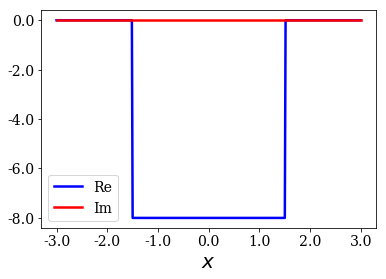

1D Square-Well Potential of width 3.00 and depth 8.00
True


In [ ]:
potential.plot()
print(potential)
print(isinstance(potential, SWPotential))

## Find the Siegert states

The search of the wavenumbers of the Siegert states is limited to a certain part of the complex wavenumber plane (here, the absolute value of the real part (resp. imaginary part) of the Siegert wavenumbers must not exceed `re_kmax` (resp. `im_kmax`).

To find the wavenumbers, one has to define a grid of input-guess, made of complex wavenumbers. This grid is defined by a grid step on the real axis `re_hk` and an optional one on the imaginary axis `im_hk`. The search of the bound and anti bound states on the imaginary axis is carried out automatically (given that the number of states on this axis and the range over which they are to be found is defined by the depth and width of the potential).

In the example below, `siegerts` is a basis set, and its elements are Siegert states. A Siegert state of the 1D SWP is an instance of the `SWPSiegert` class.

In [ ]:
# Look for Siegert states in the complex plane
re_kmax = 10.
im_kmax = 3.
re_hk = 1.
im_hk = 2.
siegerts = SWPBasisSet.find_Siegert_states(potential, re_kmax, re_hk, im_kmax,
                                           im_hk=im_hk, grid=xgrid)

The basis set is a made of Siegert states and is a `SWPBasisSet` instance:

In [ ]:
# siegerts is a SWPBasisSet instance
assert isinstance(siegerts, SWPBasisSet)

# Each state in the basis set is an instance of the SWPSiegert class
assert all([isinstance(state, SWPSiegert) for state in siegerts])

You can easily iterate over the states in the basis set:

In [ ]:
print("Number of Siegert states in the basis set:", len(siegerts))

for i, state in enumerate(siegerts):
    print("State n°{}: {}".format(i+1, state))

Note that the states are ordered by type (bound, then anti-bound, then resonant, and finally anti-resonant states), and that they are stored from the lowest to the highest energy for each type. You can easily create a basis set containing only a specific type of Siegert state:

In [ ]:
bnds = siegerts.bounds
assert isinstance(bnds, SWPBasisSet)
len(bnds)

In [ ]:
abnds = siegerts.antibounds
len(abnds)

In [ ]:
res = siegerts.resonants
len(res)

In [ ]:
ares = siegerts.antiresonants
len(ares)

This way, you can be sure that the total number of states correspond to the 20 Siegert states of the original basis set. You could also use the attributes `even` or `odd` to create a `SWPBasisSet` instance made of the Siegert states of a given parity.

## Plot the Siegert states and the basis sets

**Three types of plot are provided for that purpose:**

1. The first one allows to plot the wavefunctions of any indivual Siegert states.

* Another one represent the wavefunctions of all the Siegert states in the basis set on one plot.

* The third type plots of the wavenumbers or the energies of the states in the basis set.

### Wavefunction of a Siegert state 

Given that a grid was passed to the `find_Siegert_states` method, each Siegert state can be plotted with the `plot` method, just like the potential. You may also modify the range of the plot by specifying the optional arguments `xlim` and `ylim`.

In [ ]:
for state in siegerts:
    # Note the use of the representaton of a Siegert state as title
    state.plot(xlim=(-3*l/4., 3*l/4.), ylim=(-1, 1), title=repr(state))

Note that the resonant and antiresonant states go by pair: the wavefunction of an antiresonant state correspond to the conjugate of the resonant wavefunction, and the same relation exists for their energies. The wavefunction of any Siegert state that is not bound diverges for infinite $x$.

### Plot all the wavefunctions of the basis set

A `SWPBasisSet` instance has a `plot_wavefunctions` method to plot the wavefunctions of all the Siegert states in the basis set (except for the anti-bound states, for clarity). Each wavefunction is translated by the corresponding energy (or absolute value of the energy for resonant and anti-resonant states).

In [ ]:
siegerts.plot_wavefunctions()

As you can see, the wavefunctions of a pair of resonant and anti-resonant states have the same real part and an opposite imaginary part.

The number of resonant states wavefunctions to plot may be defined by `nres`. You may use `file_save` to define where to save the plot (the available file formats depend on your [matplotlib backend](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend)).

In [ ]:
siegerts.plot_wavefunctions(nres=2, file_save='wavefunctions_2_res.pdf')

Note how the resonant couple is related to the bound states: the parity oscillates between even and odd for the bound states, and this order is kept for resonant states. Also note the number of antinodes that is increasing from bottom to top; in particular, the last bound state is even and has four antinodes inside the potential, while the first resonant couple is odd and exhibit five antinodes.

Eventually, `xlim` and `ylim` are other optional parameters to set the plot range. If no resonant states are desired, then only the bound states are plotted

In [ ]:
siegerts.plot_wavefunctions(nres=0, file_save='wavefunctions_no_res.pdf',
                            ylim=(-V0-0.5, 0.5))

### Plot the wavenumbers and energies of the basis set

The wavenumber and energy plots can also be saved in a file by defining the optional argument `file_save`. Again, the range of the axis of the plot can be defined by `xlim` and `ylim`.

In [ ]:
siegerts.plot_wavenumbers(file_save="poles_wn.pdf")

In [ ]:
siegerts.plot_energies(xlim=(-V0, 20), ylim=(-7, 7), file_save="poles_en.pdf")

The four types of Siegert states are clearly visible:

* the bound states have positive, purely imaginary wavenumbers (and therefore negative, purely real energies),

* the anti-bound states have negative, purely imaginary wavenumbers (and therefore negative, purely real energies),

* the wavenumber of a resonant state has a positive real part and a negative imaginary part (and therefore its energy has a positive real part and a negative imaginary part),

* the wavenumber of an anti-resonant state has a negative real part and a negative imaginary part (and therefore its energy has a positive real part and a positive imaginary part),

## Variation of the potential depth

It is then easy to compare the Siegert states found for different SW potentials. The example given here shows that a couple of resonant/anti-resonant states collapses into two anti-bound states as the depth of the potential is increased.

In [ ]:
# Define a some potential depths
depths = np.arange(4.65, 4.751, 0.01) # Multiple potential depths
l = 3.                                # One potential width

# Parameters for the search of Siegert states in the complex 
# wavenumber plane
re_kmax = 10.
im_kmax = 3.
re_hk = 1.
im_hk = 2.

# Loop over the depths to create multiple potentials and 
# find their Siegert states
basis_sets = []
for V0 in depths:
    pot = SWPotential(l, V0)
    basis_sets.append(SWPBasisSet.find_Siegert_states(pot, re_kmax, re_hk,
                                                      im_kmax, im_hk=im_hk))

In [ ]:
# Plot the wavenumbers for all the potentials
xl=3.5
for siegerts in basis_sets:
    siegerts.plot_wavenumbers(xlim=(-xl,xl), title="$V_0 = {:.2f}$".format(siegerts.potential.depth))

As you can see, a resonant couple has coalesced into two anti-bound states, one moving down the imaginary axis, the other moving up:

In [ ]:
print("Anti-bound states:")
for siegerts in basis_sets:
    abnds = siegerts.antibounds
    print("depth:", abnds[0].potential.depth)
    for ab in abnds:
        print("...", ab.wavenumber)

If the potential were to be even more decreased, then the anti-bound state moving up would cross the real axis and become a bound state, keeping the same number of antinodes inside the potential than the original resonant state. It is as if the potential was not attractive enough to fit all the Siegert states as bound states.

## Find the continuum states

The continuum states are known analytically. They are in infinite number and have a positive energy (hence, continuum). This continuum can be discretized over a given grid of wavenumbers thanks to the `find_continuum` method, given a (strictly positive) maximum wavenumber `kmax` and a grid-step `hk`. An optional minimal wavenumber `kmin` can be passed as argument.

In [ ]:
# Let us go back to the initial potential
V0 = 8.
l  = 3.
potential = SWPotential(l, V0, grid=xgrid)

# Find some continuum states of this potential, whose wavenumbers range
# fromn 1 to 2 with a wavenumber grid step of 0.25
hk = 0.25
kmax = 2
continuum = SWPBasisSet.find_continuum_states(potential, kmax, hk, kmin=1)

You can check that the result is a `SWPBasisSet` instance whose states are `SWPContinuum` instances that have the expected wavenumbers:

In [ ]:
# continuum is a SWPBasisSet instance:
assert isinstance(continuum, SWPBasisSet)

# All the states in continuum are SWPContinuum instances:
assert all([isinstance(state, SWPContinuum) for state in continuum])

# Their wavenumbers correspond to the expected values:
continuum.wavenumbers

Note that each wavenumber is repeated twice: this is beacause there are an even and an odd continuum state for each positive wavenumber.

## Continuum states around a resonance

The antinodes of the wavefunctions of continuum states wavefunctions reach a maximum inside the potential for energies corresponding to the absolute value of resonant energies. This is only true for the continuum state of the same parity as the resonance.

### Around the first resonance

In [ ]:
# Find some of the Siegert states once again
siegerts = SWPBasisSet.find_Siegert_states(potential, 4, re_hk, im_kmax)

# Get the first resonant state
ires = 0
res = siegerts.resonants[ires]
print("Resonance of absolute energy: {:.3f} (parity: {})"
      .format(abs(res.energy), res.parity))

# Define a grid of wavenumbers around that resonance 
# and find the continuum states
hk = 0.25
kmid = abs(res.wavenumber)
kmin = kmid-hk
kmax = kmid+3*hk/2
continuum = SWPBasisSet.find_continuum_states(potential, kmax, hk, 
                                              kmin=kmin, grid=xgrid)

# Plot the even continuum states
for c in continuum.even:
    c.abs().plot(ylim=(0,0.6), title=repr(c))

As you can see above, the maximum of amplitude is reached at the resonant absolute energy for the even continuum states, while it is not the case for the odd continuum states below:

In [ ]:
for c in continuum.odd:
    c.abs().plot(ylim=(0,0.6), title=repr(c))

### Around the second resonance

The second resonance being odd, it is the odd continuum state wavefunction that reaches a maximum for a wavenumbereauql to the absolute value of the resonant wavenumber:

In [ ]:
# Get the first resonant state
ires = 1
res = siegerts.resonants[ires]
print("Resonance of absolute energy: {:.3f} (parity: {})"
      .format(abs(res.energy), res.parity))

# Define a grid of wavenumbers around that resonance 
# and find the continuum states
hk = 0.25
kmid = abs(res.wavenumber)
kmin = kmid-hk
kmax = kmid+3*hk/2
continuum = SWPBasisSet.find_continuum_states(potential, kmax, hk, 
                                              kmin=kmin, grid=xgrid)

# Plot the odd continuum states
for c in continuum.odd:
    c.abs().plot(ylim=(0,0.6), title=repr(c))

This concludes this tutorial showing the basics of the SiegPy module. You should be able to:

* define a square-well potential with the `SWPotential` class,

* find Siegert and continuum states that are eigenstates of the Hamiltonian involving a square-well potential and store them into a `SWPBasisSet` instance,

* use some of their attributes and methods, especially to plot some quantities of interest.

You should also know that:

* there are four different types of Siegert states,

* the Siegert and continuum states of the SWP are instances of the `SWPSiegert` and `SWPContinuum` classes, respectively.